In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [10]:
# Load the pickle file
data_list = pd.read_pickle('app/data/arxiv_10k.pkl')

# Convert list of dictionaries to DataFrame
df = pd.DataFrame(data_list)

# Display basic information about the dataset
print("Dataset Shape:")
print(df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
df.head(1)

Dataset Shape:
(10000, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10000 non-null  object
 1   title       10000 non-null  object
 2   abstract    10000 non-null  object
 3   authors     10000 non-null  object
 4   categories  10000 non-null  object
 5   doi         10000 non-null  object
 6   submitter   10000 non-null  object
 7   year        10000 non-null  object
dtypes: object(8)
memory usage: 625.1+ KB
None

First few rows:


,id,title,abstract,authors,categories,doi,submitter,year
0,2001.00117,Non-relativistic expansion of Dirac equation w...,Inspired by the reconstituted similarity renor...,"Yixin Guo, Haozhao Liang",nucl-th math-ph math.MP quant-ph,10.1103/PhysRevC.101.024304,Yixin Guo,2020


In [4]:
# Basic statistical summary for numerical columns
print("Statistical Summary:")
display(df.describe(include='all'))

Statistical Summary:


,id,title,abstract,authors,categories,doi,submitter,year
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,9999,10000,9852,2467,9997,9068,1
top,2002.10854,Optical spectroscopy of type-2 LINERs,The arithmetic complexity counts the number of...,CMS Collaboration,astro-ph.GA,10.1109/CSCI49370.2019.00032,Andrei Velichko,2020
freq,1,2,1,9,347,2,9,10000


In [5]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
display(missing_info[missing_info['Missing Values'] > 0])

Missing Values:


,Missing Values,Percentage


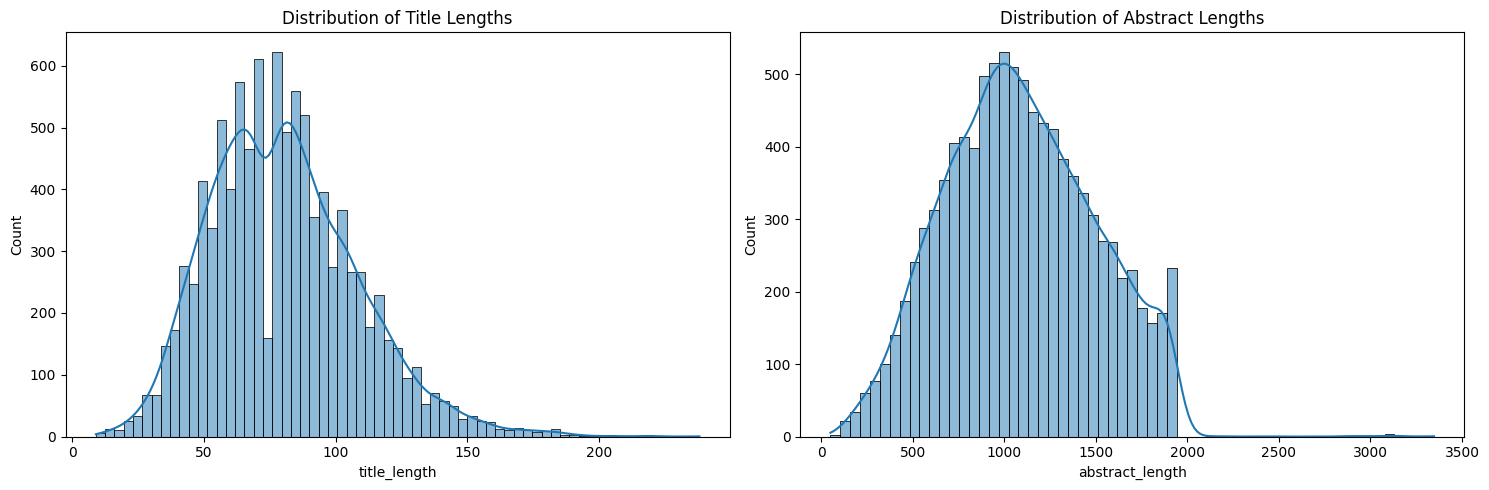

In [6]:
# Analyze text lengths
df['title_length'] = df['title'].str.len()
df['abstract_length'] = df['abstract'].str.len()

# Create histograms for text lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='title_length', kde=True, ax=ax1)
ax1.set_title('Distribution of Title Lengths')

sns.histplot(data=df, x='abstract_length', kde=True, ax=ax2)
ax2.set_title('Distribution of Abstract Lengths')

plt.tight_layout()
plt.show()

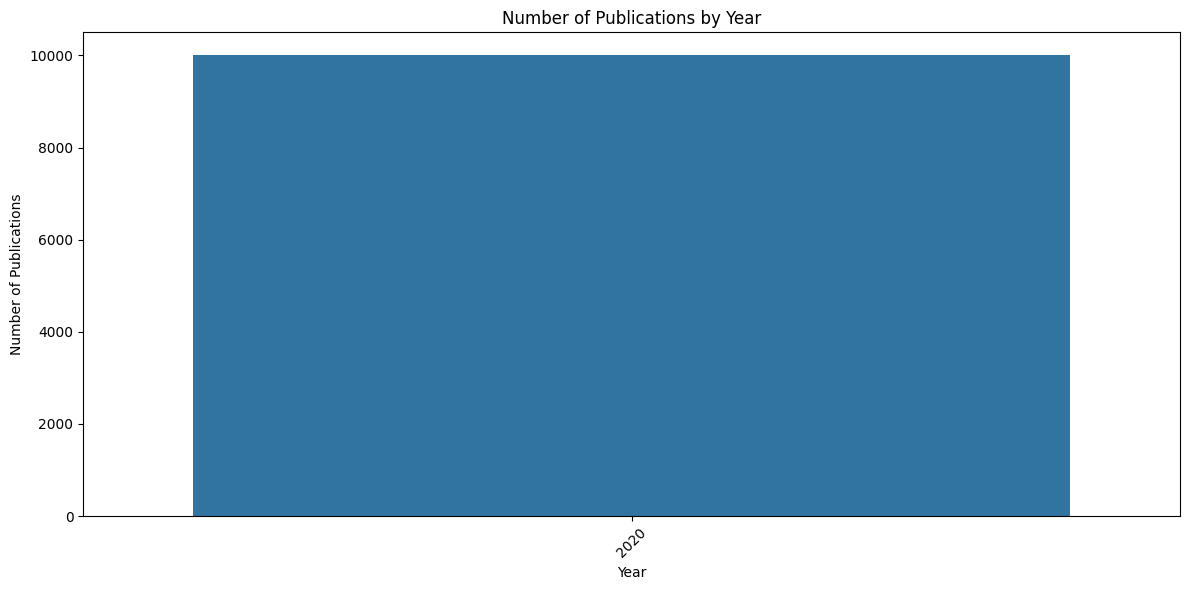

In [7]:
# Analyze publication years
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Number of Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

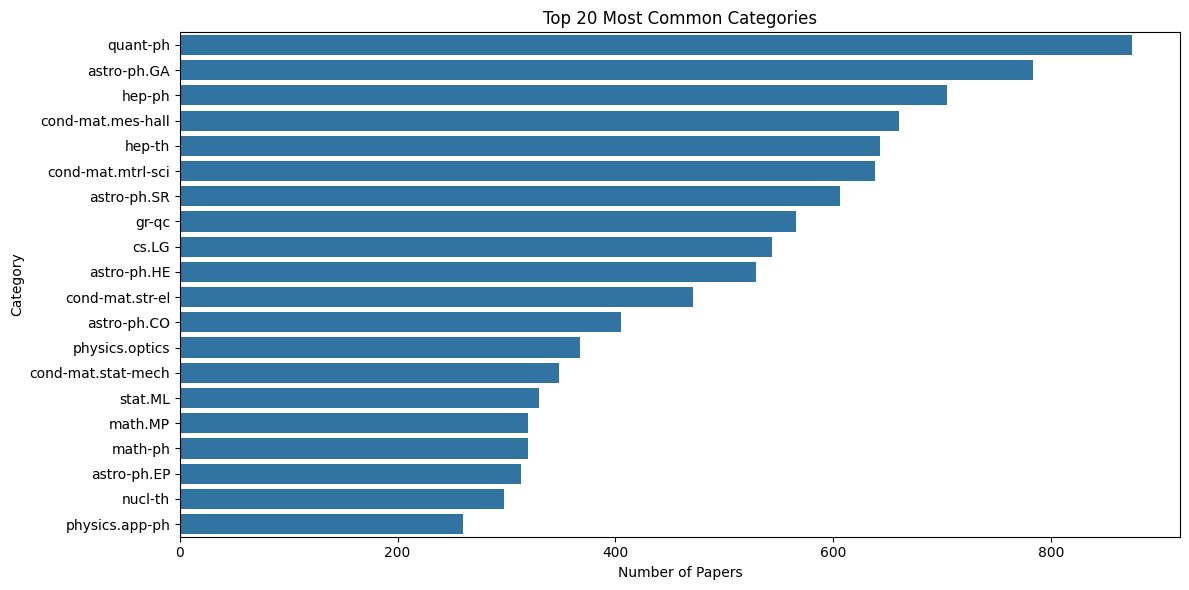

In [8]:
# Analyze categories
# Split categories and count occurrences
all_categories = []
for cats in df['categories']:
    if isinstance(cats, str):
        all_categories.extend(cats.split())

category_counts = pd.Series(all_categories).value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Top 20 Most Common Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

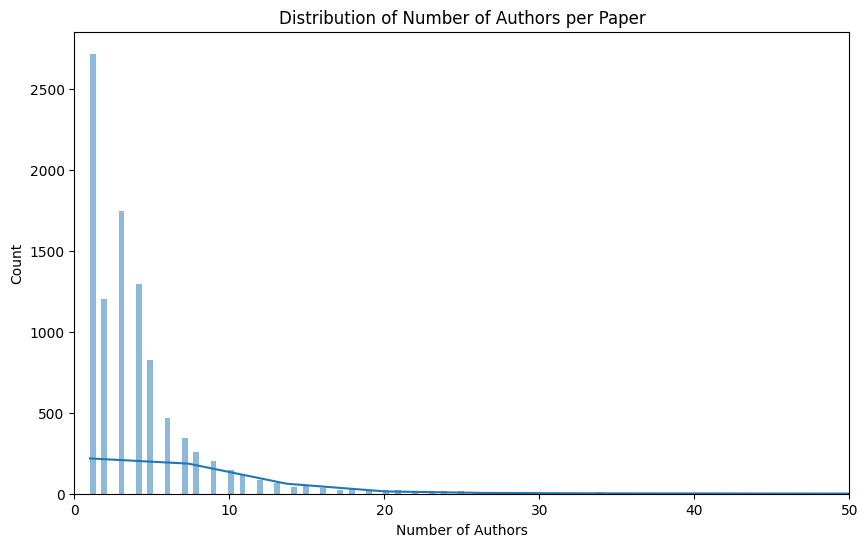

In [9]:
# Analyze authors
# Count number of authors per paper
df['author_count'] = df['authors'].str.count(',') + 1

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='author_count', kde=True)
plt.title('Distribution of Number of Authors per Paper')
plt.xlabel('Number of Authors')
plt.ylabel('Count')
plt.xlim(0, 50) 
plt.show()

## Lewattt